# Spotify Recomendator


Você provavelmente já se perguntou como o sistema de recomendação do spotify funciona. Não somente do spotify, mas diversos sistemas de recomendação de músicas, filmes e séries utilizam aprendizado não supervisiado e técnicas como clusterização para gerar recomendações para seus clientes.

Nesse notebook vamos implementar algo parecido utilizando os dados retirados da API do Spotify.

Vamos utilizar a WEB-API do Spotify. O processo de retirada dos dados da API é bem simples. Basta seguir as instruções no próprio site da WEB-API do Spotify

As features que vamos analisar estão listadas no link: https://developer.spotify.com/documentation/web-api/reference/get-several-audio-features

Esse projeto é um projeto de estudo. Sinta-se livre para utilizar o código listado aqui como você bem entender.

In [2]:
import pandas as pd
import numpy as np

dados_musicas = pd.read_csv('./Dados_totais.csv')
dados_por_generos = pd.read_csv('./data_by_genres.csv')
dados_por_ano = pd.read_csv('./data_by_year.csv')

### Análise dos dados
Vamos realizar uma análise do dataframe gerado.

In [3]:
dados_musicas.head(2)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,artists_song
0,0.285,2000,0.00239,Coldplay,0.429,266773,0.661,0,3AJwUDP919kvQ9QcozQPxg,0.000121,11,0.2340,-7.227,1,Yellow,84,0.0281,173.372,Coldplay - Yellow
1,0.613,2000,0.14300,OutKast,0.843,270507,0.806,1,0I3q5fE6wg7LIfHGngUTnV,0.000000,4,0.0771,-5.946,0,Ms. Jackson,80,0.2690,94.948,OutKast - Ms. Jackson


In [4]:
dados_por_generos.head(2)

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.3616,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.1310,-16.854000,0.076817,120.285667,0.221750,52.500000,5


In [5]:
dados_por_ano.head(2)

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.20571,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.24072,-19.275282,0.116655,100.884521,0.535549,0.140845,10


In [6]:
dados_musicas['year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

Como os dados das nossas músicas só corresponde à musicas depois dos anos 2000, vamos filtrar os dados dos anos para termos somente dados que correspondem à anos >= 2000

In [7]:
dados_por_ano = dados_por_ano[dados_por_ano['year']>=2000]
dados_por_ano.reset_index()

,index,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,79,1,2000,0.289323,0.590918,242724.642638,0.625413,0.101168,0.197686,-8.247766,0.089205,118.999323,0.559475,46.684049,7
1,80,1,2001,0.286842,0.583318,240307.796010,0.626986,0.107214,0.187026,-8.305095,0.089182,117.765399,0.541479,48.750125,7
2,81,1,2002,0.282624,0.576160,239503.283000,0.641270,0.088048,0.193911,-7.686640,0.084308,119.239738,0.542397,48.655500,7
3,82,1,2003,0.256471,0.575763,244670.575230,0.660165,0.083049,0.196976,-7.485545,0.093926,120.914622,0.530504,48.626407,7
4,83,1,2004,0.280559,0.567680,237378.708037,0.648868,0.077934,0.202199,-7.601655,0.094239,121.290346,0.524489,49.273143,7
5,84,1,2005,0.255764,0.572281,237229.588205,0.653209,0.090194,0.190082,-7.466159,0.093334,121.617967,0.532531,50.953333,0
6,85,1,2006,0.279986,0.568230,234042.914359,0.650326,0.077701,0.188289,-7.265501,0.085847,121.798615,0.520028,51.313846,7
7,86,1,2007,0.254081,0.563414,241049.962564,0.668305,0.072957,0.196127,-7.044536,0.084347,124.087516,0.516794,51.075897,7
8,87,1,2008,0.249192,0.579193,240107.315601,0.671461,0.063662,0.198431,-6.843804,0.077356,123.509934,0.527542,50.630179,0
9,88,1,2009,0.261929,0.564190,238140.013265,0.670749,0.075872,0.205252,-7.046015,0.085458,123.463808,0.507170,51.440816,0


In [8]:
dados_por_ano.head(2)

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
79,1,2000,0.289323,0.590918,242724.642638,0.625413,0.101168,0.197686,-8.247766,0.089205,118.999323,0.559475,46.684049,7
80,1,2001,0.286842,0.583318,240307.796010,0.626986,0.107214,0.187026,-8.305095,0.089182,117.765399,0.541479,48.750125,7


In [9]:
dados_musicas.shape

(20311, 19)

De acordo com o link citado anteriormente (https://developer.spotify.com/documentation/web-api/reference/get-several-audio-features), existem algumas features que não tem importância para o nosso caso. Dessa forma, vamos remover essas colunas desnecessárias do nosso dataframe

In [10]:
dados_musicas = dados_musicas.drop(['explicit', 'key', 'mode'], axis=1)
dados_musicas.head(2)

,valence,year,acousticness,artists,danceability,duration_ms,energy,id,instrumentalness,liveness,loudness,name,popularity,speechiness,tempo,artists_song
0,0.285,2000,0.00239,Coldplay,0.429,266773,0.661,3AJwUDP919kvQ9QcozQPxg,0.000121,0.2340,-7.227,Yellow,84,0.0281,173.372,Coldplay - Yellow
1,0.613,2000,0.14300,OutKast,0.843,270507,0.806,0I3q5fE6wg7LIfHGngUTnV,0.000000,0.0771,-5.946,Ms. Jackson,80,0.2690,94.948,OutKast - Ms. Jackson


O mesmo pode ser feito para os outros dataframes.

In [11]:
dados_por_generos = dados_por_generos.drop(['mode', 'key'], axis=1)
dados_por_ano = dados_por_ano.drop(['mode', 'key'], axis=1)

In [12]:
dados_por_generos.head(2)
dados_por_ano.head(2)

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
79,2000,0.289323,0.590918,242724.642638,0.625413,0.101168,0.197686,-8.247766,0.089205,118.999323,0.559475,46.684049
80,2001,0.286842,0.583318,240307.796010,0.626986,0.107214,0.187026,-8.305095,0.089182,117.765399,0.541479,48.750125


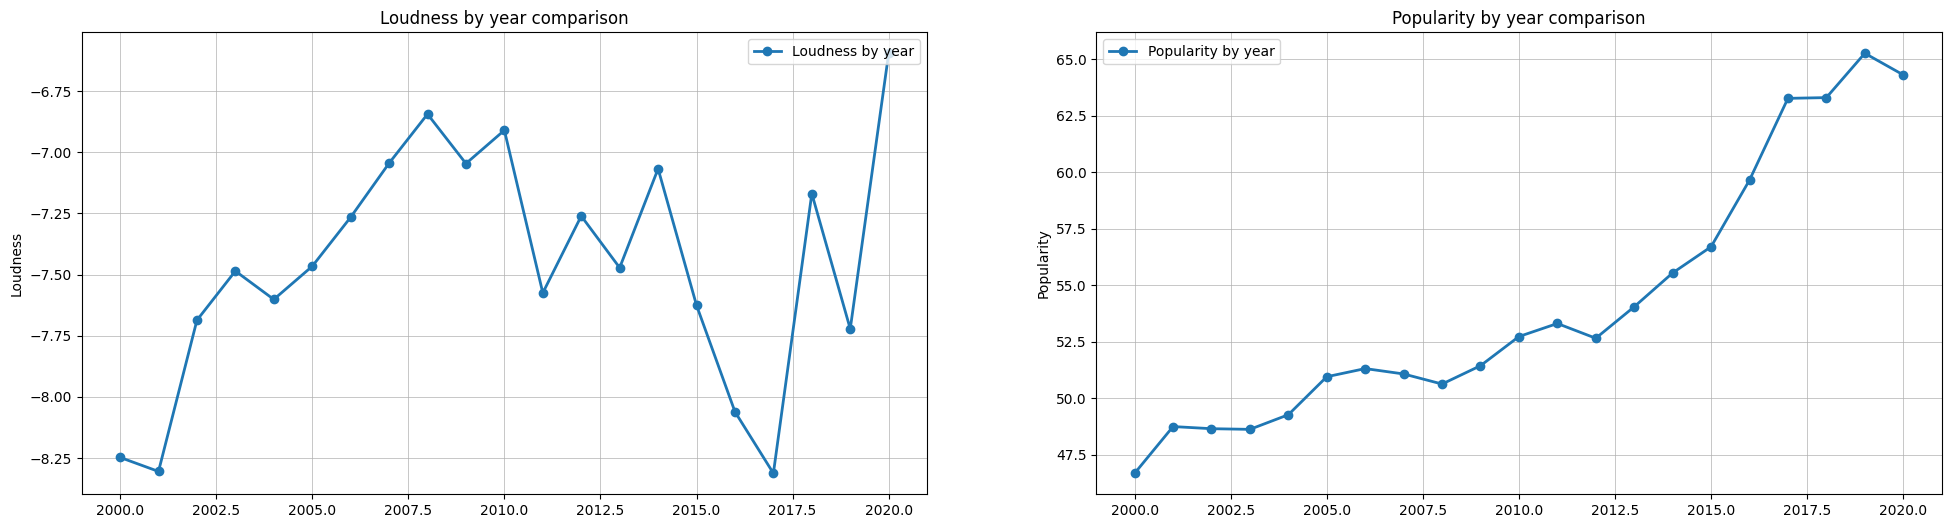

In [13]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(24,6))

axes[0].plot(dados_por_ano['year'], dados_por_ano['loudness'], marker='o', linewidth=2.0, label="Loudness by year")
axes[0].set_ylabel("Loudness")
axes[0].set_title(f'Loudness by year comparison')
axes[0].grid(axis='y', linestyle='-', linewidth=0.5)
axes[0].grid(axis='x', linestyle='-', linewidth=0.5)
axes[0].legend(loc='upper right')

axes[1].plot(dados_por_ano['year'], dados_por_ano['popularity'], marker='o', linewidth=2.0, label="Popularity by year")
axes[1].set_ylabel("Popularity")
axes[1].set_title(f'Popularity by year comparison')
axes[1].grid(axis='y', linestyle='-', linewidth=0.5)
axes[1].grid(axis='x', linestyle='-', linewidth=0.5)
axes[1].legend(loc='upper left')

#axes[2].pie(dados['tratamento'].value_counts(), labels=['Com droga', 'Com controle'], autopct='%1.1f%%', startangle=90)
#axes[2].axis('equal')

In [14]:
dados = dados_musicas[['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'popularity']]

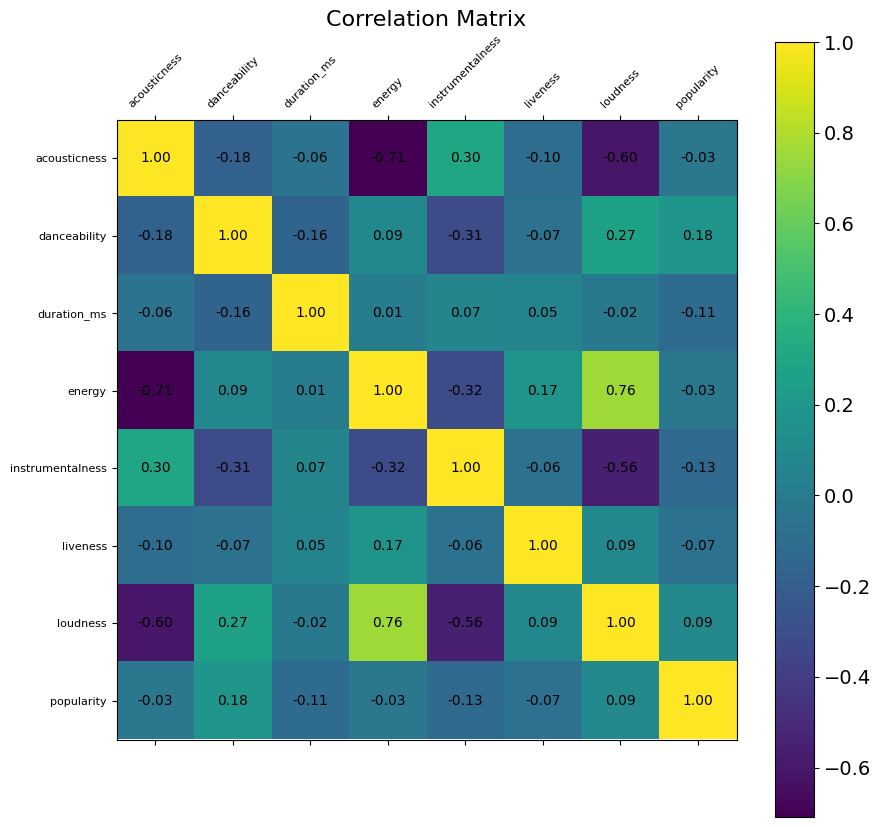

In [15]:
f = plt.figure(figsize=(10, 10))
plt.matshow(dados.corr(), fignum=f.number)
plt.xticks(range(dados.shape[1]), dados.columns, fontsize=8, rotation=45)
plt.yticks(range(dados.shape[1]), dados.columns, fontsize=8)

for (i, j), z in np.ndenumerate(dados.corr()):
    plt.text(j, i, '{:0.2f}'.format(z), ha='center', va='center', color='black')

cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

### Clusterização - PCA


A primeira ideia seria clusterizar por gêneros! Dito isso, vamos remover colunas indesejadas do dataset "dados_por_generos". O principal motivo disso é porque precisamos de apenas dados numéricos (se não precisariamos complicar um pouco mais as coisas).

In [16]:
dados_por_generos['genres'].value_counts().sum()
dados_generos1 = dados_por_generos.drop('genres', axis=1)
dados_generos1

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333
1,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000
2,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000
3,0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882
4,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071
...,...,...,...,...,...,...,...,...,...,...,...
2968,0.222625,0.547082,2.580991e+05,0.610240,0.143872,0.204206,-11.295878,0.061088,125.494919,0.596155,33.778943
2969,0.161000,0.863000,2.063200e+05,0.909000,0.000000,0.108000,-5.985000,0.081300,119.038000,0.845000,58.000000
2970,0.263261,0.748889,3.060728e+05,0.622444,0.257227,0.089678,-10.289222,0.038778,101.965222,0.824111,46.666667
2971,0.993000,0.705667,1.984173e+05,0.172667,0.468633,0.179667,-11.453333,0.348667,91.278000,0.739000,0.000000


Vamos realizar algumas mudanças de dimensionalidade nestes datasets. A ideia disso é que, como temos muitas features, fica dificil visualizar e analisar os dados de forma completa. Utilizando o PCA, podemos redimensionalizar o nosso dataset.

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Temos 11 colunas no nosso dataset. Isso significa que nosso dataset possui dimensão 11 e queremos reduzir isso para 2. Desta forma, vamos utilizar n_components=2 no pipeline do PCA.

Além disso, vamos definir uma SEED.

Para dimensionarmos os dados numéricos antes da modelagem, podemos utilizar a normalização ou a padronização, que são técnicas populares e bem confundidas em âmbitos gerais. Vamos analisar cada uma delas separadamente.

A normalização dimensiona cada variável de entrada separadamente para o intervalo 0-1, que é o intervalo para valores de ponto flutuante em que temos mais precisão. 
Já a padronização dimensiona cada variável de entrada separadamente, subtraindo a média (chamada de centralização) e a dividindo pelo desvio padrão para deslocar a distribuição, a fim de ter uma média de 0 e um desvio padrão de 1. Esse processo pode ser pensado como subtrair o valor médio ou centralizar os dados e é necessário conhecer os valores de média e de desvio padrão dos dados.

Para padronizar os dados podemos usar a função StandardScaler do Sklearn. É importante lembrar que a padronização assume que as suas observações de dados se ajustam a uma distribuição gaussiana, com média e desvio padrão bem comportados.

In [18]:
SEED = 1224
np.random.seed(1224)

pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2, random_state=SEED))])

In [19]:
pca_pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('PCA', PCA(n_components=2, random_state=1224))])

Vamos gerar os embeddings para treinar o modelo que vamos utilizar.

In [20]:
genre_embedding_pca = pca_pipeline.fit_transform(dados_generos1)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding_pca)

In [21]:
projection

,x,y
0,5.910268,-0.011146
1,2.787093,4.498483
2,-0.757538,-1.258495
3,1.020521,-0.931690
4,0.753911,-0.999861
...,...,...
2968,-0.475136,-0.017126
2969,-3.026756,-1.304983
2970,-0.832511,-1.089726
2971,1.774790,-3.695233


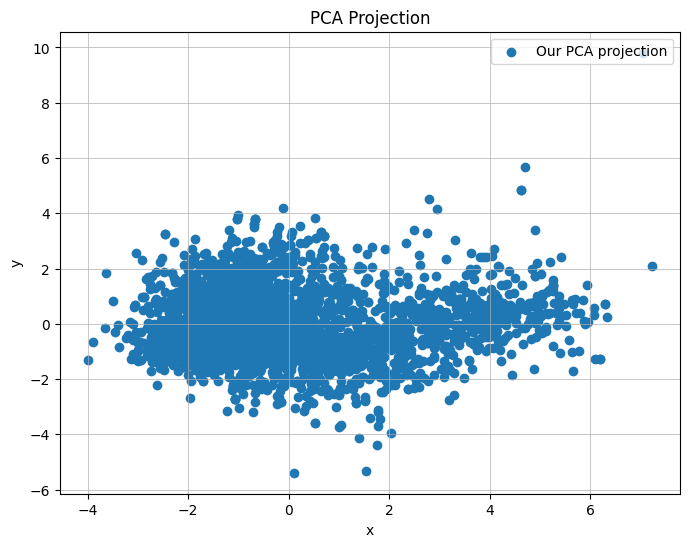

In [22]:
fig, axes = plt.subplots(1, 1, figsize=(8,6))

axes.scatter(projection['x'], projection['y'], marker='o', label="Our PCA projection")
axes.set_ylabel("y")
axes.set_xlabel("x")
axes.set_title(f'PCA Projection')
axes.grid(axis='y', linestyle='-', linewidth=0.5)
axes.grid(axis='x', linestyle='-', linewidth=0.5)
axes.legend(loc='upper right')

Vamos agora clusterizar utilizando K-Means

In [23]:
from sklearn.cluster import KMeans

kmeans_pca = KMeans(n_clusters=5, verbose=True, random_state=SEED)
kmeans_pca.fit(projection)

Initialization complete
Iteration 0, inertia 5000.532543302806.
Iteration 1, inertia 4285.8134435436195.
Iteration 2, inertia 4040.119594066834.
Iteration 3, inertia 3849.6389839787394.
Iteration 4, inertia 3731.297392611509.
Iteration 5, inertia 3667.037077296704.
Iteration 6, inertia 3617.4299326062187.
Iteration 7, inertia 3581.429768880449.
Iteration 8, inertia 3561.6098583117655.
Iteration 9, inertia 3550.9553720111107.
Iteration 10, inertia 3546.8630032705505.
Iteration 11, inertia 3544.17793277058.
Iteration 12, inertia 3543.17664410801.
Iteration 13, inertia 3542.3996086869115.
Iteration 14, inertia 3541.7527000840737.
Iteration 15, inertia 3541.1899427653257.
Iteration 16, inertia 3540.061175766949.
Iteration 17, inertia 3538.7202153487206.
Iteration 18, inertia 3536.854106175436.
Iteration 19, inertia 3535.349732604146.
Iteration 20, inertia 3533.7965513380996.
Iteration 21, inertia 3530.687751080227.
Iteration 22, inertia 3526.5591536729944.
Iteration 23, inertia 3522.526876

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=1224, verbose=True)

É interessante que possamos salvar qual gênero pertence à cada cluster dentro do nosso dataset original dados_por_generos. Dessa forma, vamos criar uma nova coluna nesse dataset. Só para fins de análise, faremos o mesmo para o dataset projection

In [24]:
dados_por_generos['cluster_pca'] = kmeans_pca.predict(projection)
projection['cluster_pca'] = kmeans_pca.predict(projection)

In [25]:
projection

,x,y,cluster_pca
0,5.910268,-0.011146,2
1,2.787093,4.498483,2
2,-0.757538,-1.258495,3
3,1.020521,-0.931690,0
4,0.753911,-0.999861,0
...,...,...,...
2968,-0.475136,-0.017126,4
2969,-3.026756,-1.304983,3
2970,-0.832511,-1.089726,3
2971,1.774790,-3.695233,0


Uma vez que ambos os datasets tem colunas em comum, podemos atribuir para cada row do projection qual genero aquele dado possui.

In [26]:
projection['genres'] = dados_por_generos['genres']

In [27]:
projection

,x,y,cluster_pca,genres
0,5.910268,-0.011146,2,21st century classical
1,2.787093,4.498483,2,432hz
2,-0.757538,-1.258495,3,8-bit
3,1.020521,-0.931690,0,[]
4,0.753911,-0.999861,0,a cappella
...,...,...,...,...
2968,-0.475136,-0.017126,4,zolo
2969,-3.026756,-1.304983,3,zouglou
2970,-0.832511,-1.089726,3,zouk
2971,1.774790,-3.695233,0,zurich indie


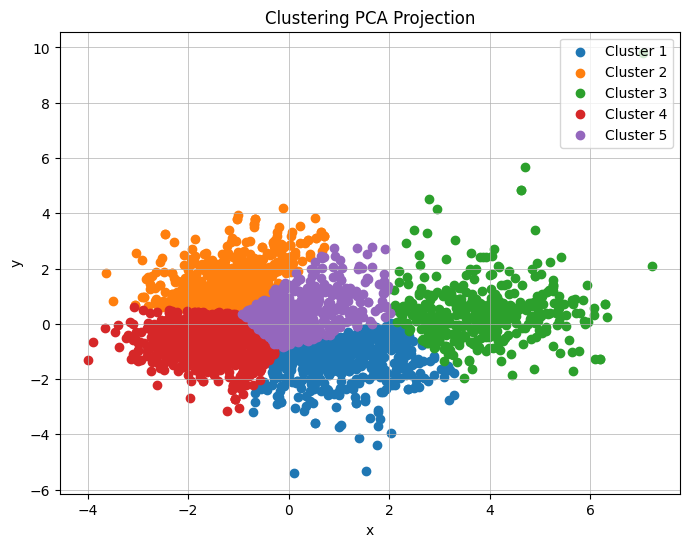

In [28]:
fig, axes = plt.subplots(1, 1, figsize=(8,6))

for i in [0, 1, 2, 3, 4]:
    x = projection[projection['cluster_pca']==i]['x']
    y = projection[projection['cluster_pca']==i]['y']
    
    axes.scatter(x, y, marker='o', label=f"Cluster {i+1}")


#axes.scatter(projection['x'], projection['y'], marker='o', color='cluster_pca', label="Our PCA projection")
axes.set_ylabel("y")
axes.set_xlabel("x")
axes.set_title(f'Clustering PCA Projection')
axes.grid(axis='y', linestyle='-', linewidth=0.5)
axes.grid(axis='x', linestyle='-', linewidth=0.5)
axes.legend(loc='upper right')

Esse clustering foi bem feito? Foi a melhor distribuição possível? Vamos verificar a variance ratio

In [29]:
# Utilizamos a primeira posição do pca_pipeline porque a primeira é pro standard

print('Ratio: ', pca_pipeline[1].explained_variance_ratio_.sum())
print('Features explained: ', pca_pipeline[1].explained_variance_.sum())

Ratio:  0.49270669947266443
Features explained:  5.421597305805701


Ou seja, o nosso PCA representa cerca de 50% do nosso dataset original.

Vamos agora aplicar a mesma ideia, mas para os dados de musicas.

In [30]:
dados_musicas.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,id,instrumentalness,liveness,loudness,name,popularity,speechiness,tempo,artists_song
0,0.285,2000,0.00239,Coldplay,0.429,266773,0.661,3AJwUDP919kvQ9QcozQPxg,0.000121,0.2340,-7.227,Yellow,84,0.0281,173.372,Coldplay - Yellow
1,0.613,2000,0.14300,OutKast,0.843,270507,0.806,0I3q5fE6wg7LIfHGngUTnV,0.000000,0.0771,-5.946,Ms. Jackson,80,0.2690,94.948,OutKast - Ms. Jackson
2,0.400,2000,0.00958,Linkin Park,0.556,216880,0.864,60a0Rd6pjrkxjPbaKzXjfq,0.000000,0.2090,-5.870,In the End,84,0.0584,105.143,Linkin Park - In the End
3,0.543,2000,0.00664,3 Doors Down,0.545,233933,0.865,6ZOBP3NvffbU4SZcrnt1k6,0.000011,0.1680,-5.708,Kryptonite,78,0.0286,99.009,3 Doors Down - Kryptonite
4,0.760,2000,0.03020,Eminem,0.949,284200,0.661,3yfqSUWxFvZELEM4PmlwIR,0.000000,0.0454,-4.244,The Real Slim Shady,80,0.0572,104.504,Eminem - The Real Slim Shady


Existem algumas colunas nesse dataset que atrapalharão nosso PCA e nossa clusterização, por se tratarem de dados Strings. Como nesse caso eu não quero perder esses dados e sim utiliza-los no meu pipeline, eu preciso transformá-los em números para que possam ser utilizados no PCA.

Dessa forma, surge o processo de dummetização. No nosso caso, como ja vamos utilizar num pipeline, vamos realizar a dummetização utilizando o OneHOtEncoder do sklearn, pois ele pode ser aplicado à pipelines

In [32]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(dtype=int)
colunas_ohe = ohe.fit_transform(dados_musicas[['artists']]).toarray()
dados_musicas_artists = dados_musicas.drop('artists', axis=1)

dados_musicas_dummies = pd.concat([dados_musicas_artists, pd.DataFrame(colunas_ohe, columns=ohe.get_feature_names_out(['artists']))], axis=1)
dados_musicas_dummies

,valence,year,acousticness,danceability,duration_ms,energy,id,instrumentalness,liveness,loudness,...,artists_Zara Larsson,artists_Zedd,artists_alt-J,artists_blackbear,artists_blink-182,artists_deadmau5,artists_for KING & COUNTRY,artists_fun.,artists_girl in red,artists_iann dior
0,0.285,2000,0.00239,0.429,266773,0.661,3AJwUDP919kvQ9QcozQPxg,0.000121,0.2340,-7.227,...,0,0,0,0,0,0,0,0,0,0
1,0.613,2000,0.14300,0.843,270507,0.806,0I3q5fE6wg7LIfHGngUTnV,0.000000,0.0771,-5.946,...,0,0,0,0,0,0,0,0,0,0
2,0.400,2000,0.00958,0.556,216880,0.864,60a0Rd6pjrkxjPbaKzXjfq,0.000000,0.2090,-5.870,...,0,0,0,0,0,0,0,0,0,0
3,0.543,2000,0.00664,0.545,233933,0.865,6ZOBP3NvffbU4SZcrnt1k6,0.000011,0.1680,-5.708,...,0,0,0,0,0,0,0,0,0,0
4,0.760,2000,0.03020,0.949,284200,0.661,3yfqSUWxFvZELEM4PmlwIR,0.000000,0.0454,-4.244,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20306,0.187,2020,0.57400,0.445,176250,0.330,0PUkanqCGTb6qseXPKOw1F,0.000000,0.1020,-8.121,...,0,0,0,0,0,0,0,0,0,0
20307,0.240,2020,0.81500,0.467,179188,0.429,6Iw6fQVKZi0fWtEQBrTFcP,0.000052,0.1770,-8.689,...,0,0,0,0,0,0,0,0,0,0
20308,0.466,2020,0.31000,0.562,253613,0.686,308prODCCD0O660tIktbUi,0.022500,0.1250,-8.480,...,0,0,0,0,0,0,0,0,0,0
20309,0.522,2020,0.20400,0.598,230600,0.472,2f8y4CuG57UJEmkG3ujd0D,0.000015,0.1080,-10.991,...,0,0,0,0,0,0,0,0,0,0


In [33]:
dados_musicas_dummies.shape


(20311, 890)

Nosso novo dataset agora possui 890 features. É muita feature para se analisar. Devemos usar o PCA para reduzir a dimensionalidade. Mas como?

Quanto maior a dimensão do meu dataset, menos eficiente será o PCA se escolhermos um número de dimensão de saída (n_components) menor. Isso em termos de machine learning é bastante custoso pois o aprendizado é menos eficiente e mais demorado. 

A ideia portanto é não especificar o número de components que teremos ao realizar o PCA e sim especificar qual é a quantidade (em porcentagem) que queremos que o nosso PCA represente do dataset original. Nesse caso utilizarei 70%

In [35]:
pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=0.7, random_state=SEED))])


### irei fazer o drop também do id, name e artists songs por se tratar de strings também. Se não, teremos erros de conversão
music_embedding_pca = pca_pipeline.fit_transform(dados_musicas_dummies.drop(['id','name','artists_song'], axis=1))
projection_m = pd.DataFrame(data=music_embedding_pca)
     

In [36]:
pca_pipeline[1].n_components_


612

Ou seja, temos 612 colunas (features) no nosso PCA. Ainda é um número bastante alto...
Vamos aplicar o processo de clusterização utilizando K-Means

In [37]:
kmeans_pca_pipeline = KMeans(n_clusters=50, verbose=False, random_state=SEED)

kmeans_pca_pipeline.fit(projection_m)

dados_musicas['cluster_pca'] = kmeans_pca_pipeline.predict(projection_m)
projection_m['cluster_pca'] = kmeans_pca_pipeline.predict(projection_m)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [38]:
projection_m['artist'] = dados_musicas['artists']
projection_m['song'] = dados_musicas['artists_song']

In [39]:
projection_m


,0,1,2,3,4,5,6,7,8,9,...,605,606,607,608,609,610,611,cluster_pca,artist,song
0,0.174796,0.731252,2.186797,-0.767192,0.594847,0.315968,-0.412322,-0.479171,-2.700668,2.109956,...,-0.009111,0.005154,-0.034027,-0.032617,-1.164871e-12,5.274601e-13,-2.057799e-12,23,Coldplay,Coldplay - Yellow
1,-1.358420,0.052935,-1.789973,1.938444,0.403606,1.023898,-1.172118,0.821698,-1.716897,0.252498,...,-0.031986,0.029708,-0.016322,-0.030234,-6.720843e-13,2.430927e-12,1.346438e-13,9,OutKast,OutKast - Ms. Jackson
2,-0.972077,0.658094,0.757500,-0.277350,-0.400393,0.402941,1.292960,1.839192,-1.562236,1.410677,...,0.017097,0.017361,-0.010979,-0.012781,-7.957170e-13,1.978507e-13,1.498561e-13,3,Linkin Park,Linkin Park - In the End
3,-0.926464,1.292091,0.398499,-0.997738,0.202219,0.620859,-0.527689,1.135529,-1.343893,1.020964,...,0.089337,0.164777,-0.064148,-0.040911,-6.076866e-12,5.636817e-12,1.172624e-11,3,3 Doors Down,3 Doors Down - Kryptonite
4,-1.710077,-0.383502,-1.258562,1.346428,1.223591,1.744579,0.094311,0.479412,-2.125376,0.389565,...,-0.011937,-0.004081,-0.017478,-0.010033,-2.776591e-13,4.612069e-13,-5.076761e-13,38,Eminem,Eminem - The Real Slim Shady
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20306,1.346699,-2.775889,0.986755,-1.704967,0.103935,-0.726582,0.253808,0.520234,-0.064513,0.204971,...,-0.235355,-0.054256,0.016922,-0.125947,4.084456e-12,-4.723304e-12,2.737624e-12,3,Bazzi,Bazzi - I Don't Think I'm Okay
20307,1.269387,-2.444619,0.971408,-0.115303,-0.719597,-1.823579,-0.545186,-1.475719,-0.338390,0.272129,...,-0.183026,0.074605,0.005622,0.000054,2.518181e-12,-1.859368e-12,-1.061485e-11,3,Bryson Tiller,Bryson Tiller - Timeless Interlude
20308,0.781916,-1.164865,0.705256,-0.947160,1.145828,-0.472667,-0.356604,0.972512,0.900317,-0.674016,...,-0.033420,-0.157564,0.213849,-0.065180,1.476541e-11,-2.925965e-11,-1.531850e-13,3,Fleet Foxes,Fleet Foxes - Sunblind
20309,0.002454,-3.056407,-0.272934,1.436355,-0.604453,0.251492,-1.361710,-0.633245,0.280076,0.521145,...,-0.784640,0.080684,0.038379,0.108493,3.149417e-12,-8.287474e-12,-1.296122e-11,9,Gunna,Gunna - NASTY GIRL / ON CAMERA


Quando realizamos o pipeline utilizando PCA, as primeiras colunas são as colunas que mais identificaram e explicam nosso dataset original (o dataset utilizado para gerar o PCA). 

Não podemos visualizar todas as 615 colunas, mas podemos analisar as 3 primeiras neste caso.

Text(0.5, 0, 'Column $2$')

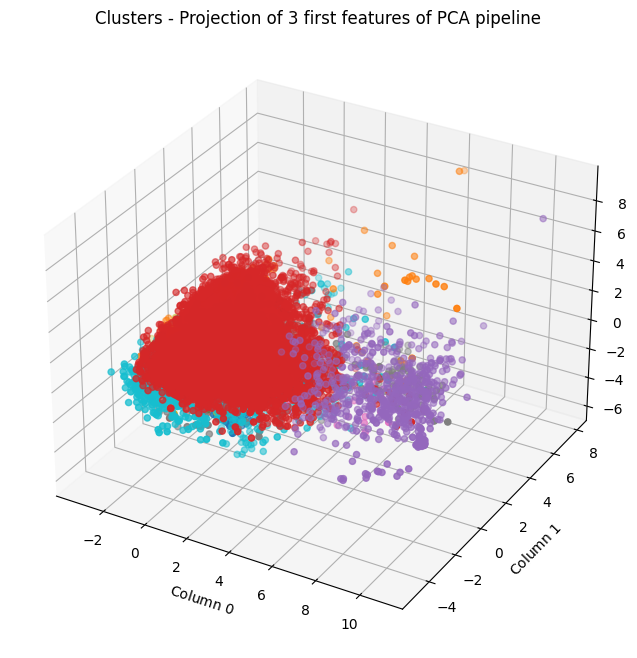

In [45]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(projection='3d')

for i in range(50):
    x = projection_m[projection_m['cluster_pca']==i][0]
    y = projection_m[projection_m['cluster_pca']==i][1]
    z = projection_m[projection_m['cluster_pca']==i][2]

    ax.scatter(x, y, z, label = f'Cluster {i}')

ax.set_title('Clusters - Projection of 3 first features of PCA pipeline')
ax.set_xlabel('Column $0$')
ax.set_ylabel('Column $1$')
ax.set_zlabel('Column $2$')

É possível criar uma recomendação de uma musica com base numa música escolhida dentro do nosso dataset?

Vamos escolher uma música específica e buscar recomendações de musicas parecidas com ela utilizando a distância euclidiana entre os pontos do cluster à qual aquela música pertence

In [52]:
nome_musica = 'OutKast - Ms. Jackson'

In [53]:
from sklearn.metrics.pairwise import euclidean_distances

cluster = list(projection_m[projection_m['song']== nome_musica]['cluster_pca'])[0]
musicas_recomendadas = projection_m[projection_m['cluster_pca']== cluster][[0, 1, 'song']]
x_musica = list(projection_m[projection_m['song']== nome_musica][0])[0]
y_musica = list(projection_m[projection_m['song']== nome_musica][1])[0]

#distâncias euclidianas
distancias = euclidean_distances(musicas_recomendadas[[0, 1]], [[x_musica, y_musica]])
musicas_recomendadas['id'] = dados_musicas['id']
musicas_recomendadas['distancias']= distancias
recomendada = musicas_recomendadas.sort_values('distancias').head(10)
recomendada

,0,1,song,id,distancias
1,-1.358420,0.052935,OutKast - Ms. Jackson,0I3q5fE6wg7LIfHGngUTnV,0.000000
3742,-1.352821,0.053268,Christina Aguilera - Ain't No Other Man,7huo2wvrCgRucUsjdSDLQV,0.005609
1218,-1.344680,0.043661,The Game - My Life,4GXH9A6fzuE0MNtqtzjhLg,0.016577
10983,-1.338918,0.046640,Dirty Heads - Spread Too Thin,3mdDdrgDEKVxd5GawWjKqy,0.020493
3983,-1.356645,0.021757,Ice Cube - It Was A Good Day,2MuJbBWAVewREJmB8WdGJ3,0.031229
17754,-1.388879,0.032714,Fat Joe - Deep Cover,71VGyhseFtCPH0RjL1lz8O,0.036560
16527,-1.380407,0.023307,Nipsey Hussle - U See Us,2fkiHKbZVhkywVvJynZNR0,0.036895
4152,-1.365641,0.015755,Black Eyed Peas - The Time (Dirty Bit),7vWFaMq63AwkFDhS2OAg5u,0.037875
845,-1.322134,0.066959,Justin Timberlake - My Love (feat. T.I.),4NeOWqHmlrGRuBvsLJC9rL,0.038902
19493,-1.337999,0.019163,Wisin & Yandel - La Reunión De Los Vaqueros,6LgGKcMoXvDtKgAp2znkKQ,0.039466
